In [11]:
import numpy as np
import pandas as pd
from sklearn import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv("C:/Users/VIBIN/Desktop/practice/data/Combined_Cycle_Power_Plant.csv")

In [13]:
df.head()
#Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) 
#and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [14]:
target = "PE"
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first = True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.3,random_state = 1)

pipe = pipeline.Pipeline([
    ("scalar", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training MSE   :", metrics.mean_squared_error(y_train,y_train_pred),
      "\nTesting MSE    :", metrics.mean_squared_error(y_test, y_test_pred),
      "\nTRAINING R2    :", metrics.r2_score(y_train, y_train_pred),
      "\nTESTING R2     :", metrics.r2_score(y_test, y_test_pred))

      


Training MSE   : 9.787557016553571e-05 
Testing MSE    : 9.882808699958441e-05 
TRAINING R2    : 0.92989286475448 
TESTING R2     : 0.9294444312957376


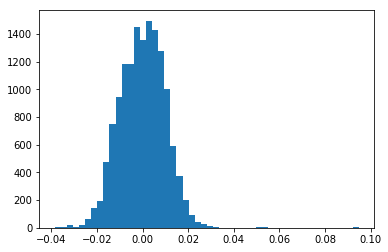

In [16]:
plt.hist(y_test_pred-y_test, bins = 50);

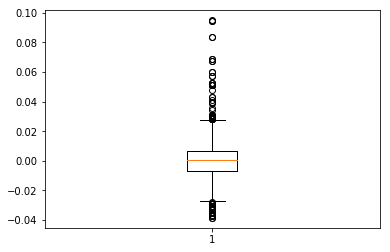

In [18]:
plt.boxplot(y_test_pred-y_test);

Text(0.5,1,'Residual plot')

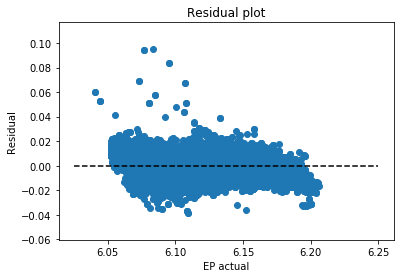

In [22]:
#A residual value is a measure of how much a regression line vertically misses a data point.
#Regression lines are the best fit of a set of data.
#A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable
plt.scatter(y_test, y_test_pred-y_test)
plt.plot([6.025, 6.25], [0,0], ls = "--", color = "black")
plt.xlabel("EP actual")
plt.ylabel("Residual")
plt.title("Residual plot")

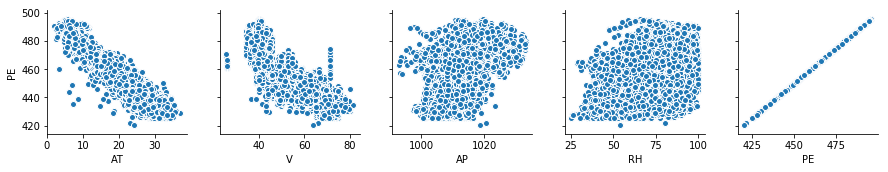

In [26]:
sns.pairplot(df,x_vars = df.columns, y_vars='PE')

In [31]:
target = 'PE'
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X,drop_first = True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.3,random_state=1)
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 4, include_bias = False)),
    ("scalar",preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train,y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training MSE:    ", metrics.mean_squared_error(y_train, y_train_pred),
      "\nTesting MSE:    ", metrics.mean_squared_error(y_test, y_test_pred),
      "\nTraining R2 Score: ", metrics.r2_score(y_train, y_train_pred),
      "\nTesting R2 Score: ", metrics.r2_score(y_test, y_test_pred),
     )

Training MSE:     8.034104215973448e-05 
Testing MSE:     8.123972564723131e-05 
Training R2 Score:  0.9424526437094324 
Testing R2 Score:  0.9420011535339872
